In the recruitment domain, HR faces the challenge of predicting if the candidate is faking their salary or not. For example, a candidate claims to have 5 years of experience and earns 70,000 per month working as a regional manager. The candidate expects more money than his previous CTC. We need a way to verify their claims (is 70,000 a month working as a regional manager with an experience of 5 years a genuine claim or does he/she make less than that?) Build a Decision Tree and Random Forest model with monthly income as the target variable.
The primary business objective in this scenario is to accurately predict whether a candidate's claimed monthly income is genuine or potentially inflated. This is crucial for ensuring transparency and fairness in the recruitment process, as well as for making informed decisions regarding salary negotiations and offers. Specifically:

Verify Candidate Claims: Determine whether a candidate's claimed monthly income aligns with their stated experience level and job role.

Ensure Fair Compensation: Ensure that candidates are fairly compensated based on their qualifications and experience, without overpaying based on inflated salary claims.

Minimize Fraudulent Claims: Detect and minimize instances of candidates providing false or exaggerated salary information to gain an advantage in the recruitment process.

Constraints:
Accuracy and Reliability: The models must accurately predict whether a candidate's claimed salary is genuine or not, with minimal false positives and false negatives.

Interpretability: Decision-making in the recruitment domain often requires transparency and interpretability. Therefore, models should be interpretable, allowing HR professionals to understand the factors influencing the predictions.

Data Availability: Access to reliable and relevant data, including historical salary information, job roles, experience levels, etc., is essential for model training and validation.

Privacy and Ethics: Handling candidate data ethically and ensuring privacy compliance is paramount. Models should be developed and deployed in a manner that respects candidate privacy and complies with relevant regulations (e.g., GDPR).

Resource Constraints: Consideration of computational resources and time constraints for model development, training, and deployment.

Generalizability: Models should generalize well to new candidates and diverse job roles. Overfitting to specific subsets of data or job roles should be avoided.

By addressing these business objectives and constraints, HR professionals can deploy models that assist in verifying candidate salary claims effectively and fairly, contributing to a more transparent and efficient recruitment process.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF 
from feature_engine.outliers import Winsorizer
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("D:/Documents/Datasets/HT-data.csv")
df.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,Business Analyst,1.1,39343
1,Junior Consultant,1.3,46205
2,Senior Consultant,1.5,37731
3,Manager,2.0,43525
4,Country Manager,2.2,39891


In [5]:
df.columns

Index(['Position of the employee', 'no of Years of Experience of employee',
       ' monthly income of employee'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Position of the employee               196 non-null    object 
 1   no of Years of Experience of employee  196 non-null    float64
 2    monthly income of employee            196 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


In [7]:
df.describe()

,no of Years of Experience of employee,monthly income of employee
count,196.000000,196.000000
mean,5.112245,74194.923469
std,2.783993,26731.578387
min,1.000000,37731.000000
25%,3.000000,56430.000000
50%,4.100000,63831.500000
75%,7.100000,98273.000000
max,10.500000,122391.000000


In [8]:
df["Position of the employee"].value_counts()

Position of the employee
Partner              28
Senior Partner       25
C-level              24
Region Manager       23
CEO                  23
Country Manager      18
Manager              17
Senior Consultant    16
Junior Consultant    14
Business Analyst      8
Name: count, dtype: int64

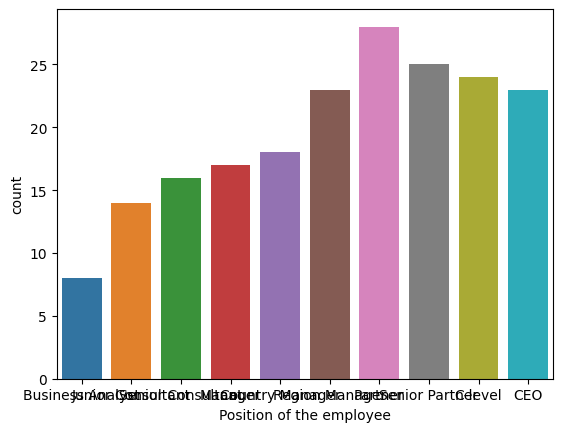

In [9]:
sns.countplot(x=df["Position of the employee"])
plt.show()

In [10]:
df["no of Years of Experience of employee"].value_counts()

no of Years of Experience of employee
4.0     14
3.2     14
1.3      7
4.5      7
4.1      7
3.9      7
3.7      7
1.1      7
3.0      7
2.9      7
2.2      7
2.0      7
1.5      7
8.2      6
10.5     6
10.3     6
9.6      6
9.5      6
9.0      6
8.7      6
5.1      6
7.9      6
7.1      6
6.8      6
6.0      6
5.9      6
5.3      6
4.9      6
1.0      1
Name: count, dtype: int64

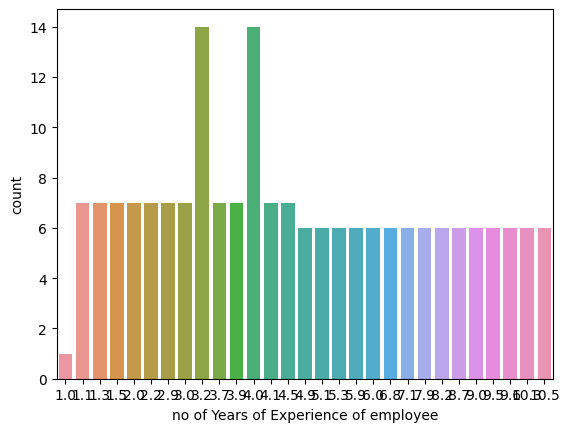

In [11]:
sns.countplot(x=df["no of Years of Experience of employee"])
plt.show()

In [12]:
df[" monthly income of employee"].value_counts()

 monthly income of employee
39343     7
57189     7
46205     7
61111     7
57081     7
56957     7
55794     7
63218     7
67938     7
64445     7
60150     7
56642     7
39891     7
43525     7
37731     7
54445     7
113812    6
122391    6
112635    6
116969    6
105582    6
109431    6
93940     6
101302    6
98273     6
91738     6
81363     6
83088     6
66029     6
121872    6
Name: count, dtype: int64

<Axes: >

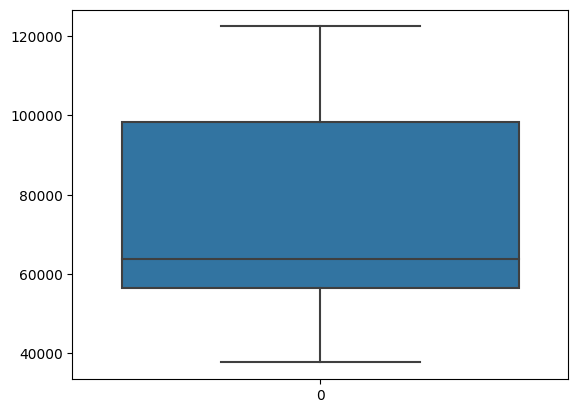

In [14]:
sns.boxplot(df[" monthly income of employee"])

<Axes: >

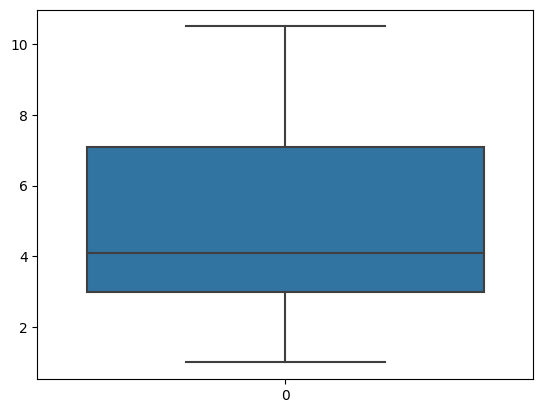

In [15]:
sns.boxplot(df["no of Years of Experience of employee"])

In [16]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=[" monthly income of employee"],tail="both")
df[" monthly income of employee"]=winsor.fit_transform(df[[" monthly income of employee"]])

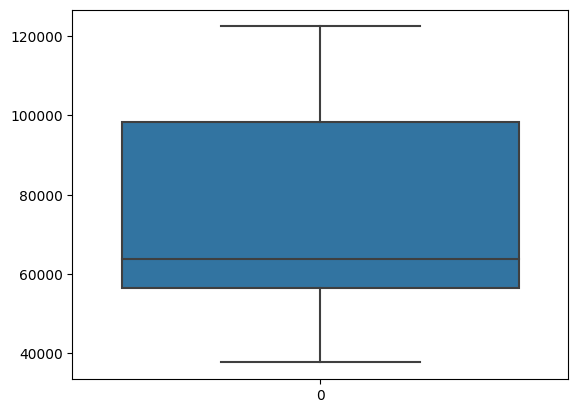

In [17]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["no of Years of Experience of employee"],tail="both")
df["no of Years of Experience of employee"]=winsor.fit_transform(df[["no of Years of Experience of employee"]])
sns.boxplot(df[" monthly income of employee"])
plt.show()

In [18]:

non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Display columns with non-numeric data
print("Columns with non-numeric data:", non_numeric_columns)


Columns with non-numeric data: Index(['Position of the employee'], dtype='object')


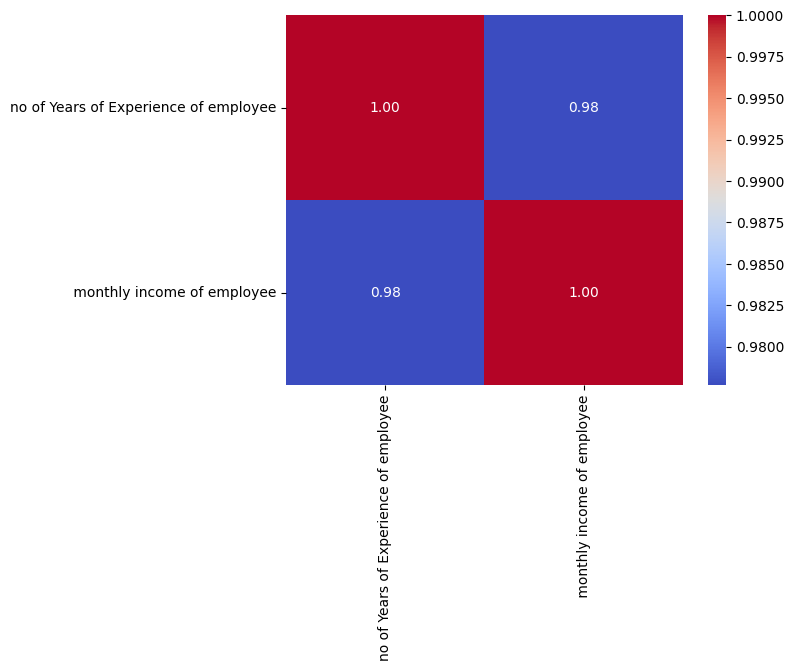

In [19]:
# Convert remaining non-numeric columns to numeric if possible
df_numeric = df.select_dtypes(include=[np.number])

# Calculate correlation matrix and plot heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


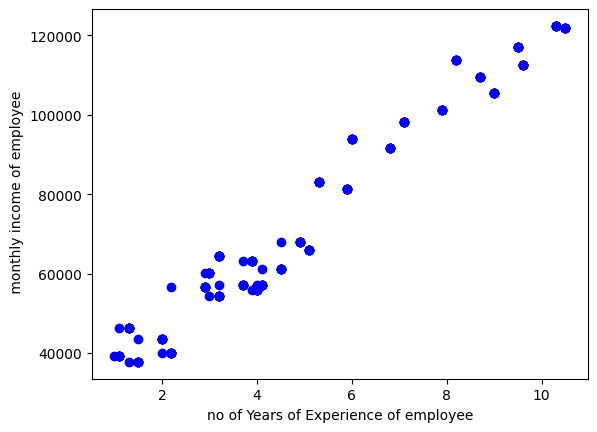

In [20]:
plt.scatter(df["no of Years of Experience of employee"],df[" monthly income of employee"],color="blue")
plt.xlabel("no of Years of Experience of employee")
plt.ylabel(" monthly income of employee")
plt.show()

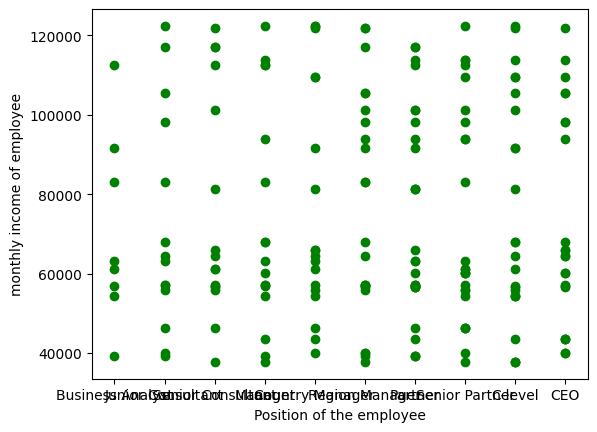

In [21]:
plt.scatter(df["Position of the employee"],df[" monthly income of employee"],color="green")
plt.xlabel("Position of the employee")
plt.ylabel("monthly income of employee")
plt.show()

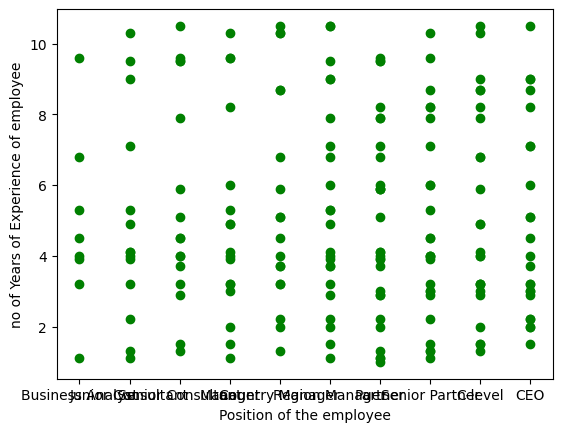

In [22]:
plt.scatter(df["Position of the employee"],df["no of Years of Experience of employee"],color="green")
plt.xlabel("Position of the employee")
plt.ylabel("no of Years of Experience of employee")
plt.show()

In [23]:
Bins=[0,5,10,15,20]
label=["low","avg","good","excellent"]
df[" monthly income of employee"]=pd.cut(df[" monthly income of employee"],Bins,labels=label)

In [24]:
df.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,Business Analyst,1.1,NaN
1,Junior Consultant,1.3,NaN
2,Senior Consultant,1.5,NaN
3,Manager,2.0,NaN
4,Country Manager,2.2,NaN


In [25]:
df[" monthly income of employee"].value_counts()

 monthly income of employee
low          0
avg          0
good         0
excellent    0
Name: count, dtype: int64

In [26]:
le=LabelEncoder()
df[" monthly income of employee"]=le.fit_transform(df[" monthly income of employee"])
df["Position of the employee"]=le.fit_transform(df["Position of the employee"])
df["no of Years of Experience of employee"]=le.fit_transform(df["no of Years of Experience of employee"])

In [27]:
df.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,0,1,0
1,4,2,0
2,8,3,0
3,5,4,0
4,3,5,0


In [28]:
x=df.drop([" monthly income of employee"],axis=1)
y=df[" monthly income of employee"]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [30]:
model=RF()

In [31]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
cm=confusion_matrix(y_test,y_pred)

In [34]:
acc=accuracy_score(y_test,y_pred)
acc

1.0